# day05-3 - Concrete Strength

In [4]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("../data/Concrete_train.csv")
df.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,233.81,0.0,94.58,197.89,4.567,947.04,852.16,28,22.835445
1,251.81,0.0,99.94,146.14,12.350,1006.00,899.76,56,44.140254
2,252.00,0.0,0.00,186.00,0.000,1111.00,784.00,7,11.465986


In [6]:
df.shape

(700, 9)

In [8]:
features = df.drop(df.columns[-1], axis=1)
features = (features - features.mean())/features.std()
features.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,-0.433823,-0.851957,0.593069,0.738156,-0.298518,-0.312014,0.960384,-0.297290
1,-0.260131,-0.851957,0.675677,-1.635245,1.008687,0.442114,1.542537,0.152766
2,-0.258298,-0.851957,-0.864589,0.192847,-1.065575,1.785116,0.126779,-0.634832


In [9]:
target = df[df.columns[-1]]
X = features.values
y = target.values

In [38]:
y.shape

(700,)

Switching from ADAM to SGD makes it converge much faster

RMSE valication =  10.084989394471377


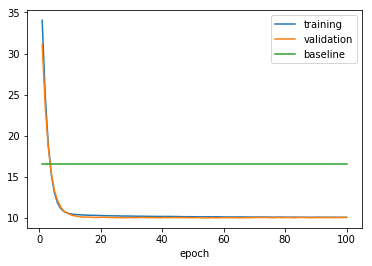

In [18]:
model = Sequential()
model.add(Dense(1, input_shape=(8,)))
model.compile(loss='mean_squared_error', optimizer='SGD')
hist = model.fit(X, y, epochs=100, validation_split=0.2, verbose=0)
results = pd.DataFrame()
results['epoch'] = hist.epoch
results['epoch'] = results['epoch'] + 1
results['training'] = np.sqrt(hist.history['loss'])
results['validation'] = np.sqrt(hist.history['val_loss'])
results['baseline'] = y.std()
ax = results.plot.line(x='epoch', y='training')
ax = results.plot.line(x='epoch', y='validation', ax = ax)
ax = results.plot.line(x='epoch', y='baseline',   ax = ax)
print('RMSE valication = ', results.validation.iloc[-1])

Training and validation are very close.  Could be underfitting.
Drive the training error to 0.  
Add more layers

RMSE valication =  10.148009824703266


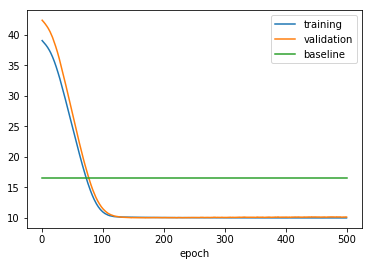

In [21]:
outputs = 8
model = Sequential()
model.add(Dense(outputs, input_shape=(8,)))
# Add a layer. karas knows to use the output from pervious layer.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')
hist = model.fit(X, y, epochs=500, validation_split=0.2, verbose=0)
results = pd.DataFrame()
results['epoch'] = hist.epoch
results['epoch'] = results['epoch'] + 1
results['training'] = np.sqrt(hist.history['loss'])
results['validation'] = np.sqrt(hist.history['val_loss'])
results['baseline'] = y.std()
ax = results.plot.line(x='epoch', y='training')
ax = results.plot.line(x='epoch', y='validation', ax = ax)
ax = results.plot.line(x='epoch', y='baseline',   ax = ax)
print('RMSE valication = ', results.validation.iloc[-1])

Add a non-linear layer so the linear layers don't collaps into 1 layer.

RMSE training   =  4.859407393102657
RMSE valication =  6.492946348127565


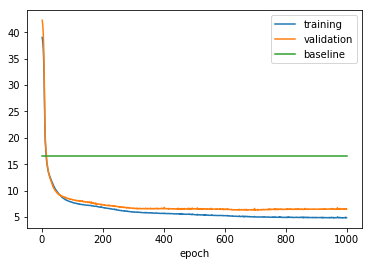

In [37]:
outputs = 8
model = Sequential()
model.add(Dense(outputs, input_shape=(8,)))
# Add a non-linear layer to separate the two linear layers.
model.add(Activation('relu'))
# Add a layer. karas knows to use the output from pervious layer.
model.add(Dense(outputs))
model.add(Activation('relu'))
model.add(Dense(outputs))
model.add(Activation('relu'))
model.add(Dense(outputs))
# Add two more layers
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')
hist = model.fit(X, y, epochs=1000, validation_split=0.2, verbose=0)
results = pd.DataFrame()
results['epoch'] = hist.epoch
results['epoch'] = results['epoch'] + 1
results['training'] = np.sqrt(hist.history['loss'])
results['validation'] = np.sqrt(hist.history['val_loss'])
results['baseline'] = y.std()
ax = results.plot.line(x='epoch', y='training')
ax = results.plot.line(x='epoch', y='validation', ax = ax)
ax = results.plot.line(x='epoch', y='baseline',   ax = ax)
print('RMSE training   = ', results.training.iloc[-1])
print('RMSE valication = ', results.validation.iloc[-1])